<a href="https://colab.research.google.com/github/Jayasri1090/EN3150-Assignment-03-Simple-convolutional-neural-network-to-perform-classification/blob/main/EN3150_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# EN3150 Assignment 03 - Jute Pest Classification

# STEP 1: Upload your Jute Pest dataset folders

from google.colab import files
import zipfile
import os
import shutil

print("Upload your Jute Pest dataset ZIP file...")
print("It should contain: train/, val/, and test/ folders")

# Upload the ZIP file containing all three folders
uploaded = files.upload()

# Extract the dataset
for filename in uploaded.keys():
    if filename.endswith('.zip'):
        print(f"Extracting {filename}...")
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall('/content/jute_pest_dataset')

        # Check what we extracted
        dataset_path = '/content/jute_pest_dataset'
        print(f"Dataset extracted to: {dataset_path}")
        print(f"📁 Contents: {os.listdir(dataset_path)}")

        # Check each folder
        for folder in ['train', 'val', 'test']:
            folder_path = os.path.join(dataset_path, folder)
            if os.path.exists(folder_path):
                class_count = len(os.listdir(folder_path))
                print(f"   📂 {folder}: {class_count} classes")
            else:
                print(f"   ❌ {folder} folder not found!")

Upload your Jute Pest dataset ZIP file...
It should contain: train/, val/, and test/ folders


KeyboardInterrupt: 

In [ ]:
# STEP 1: Explore the nested folder structure
import os

def explore_nested_structure(dataset_path):
    """
    Explore the actual nested structure of your dataset
    """
    print("Exploring nested dataset structure...")
    print("=" * 50)

    splits = ['train', 'val', 'test']

    for split in splits:
        split_path = os.path.join(dataset_path, split)
        if os.path.exists(split_path):
            print(f"\n {split.upper()} Split:")
            print("-" * 30)

            # Get all class folders inside this split
            classes = [d for d in os.listdir(split_path)
                      if os.path.isdir(os.path.join(split_path, d))]

            print(f"   Classes found: {classes}")

            # Count images in each class
            for class_name in classes:
                class_path = os.path.join(split_path, class_name)
                images = [f for f in os.listdir(class_path)
                         if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]
                print(f"   📁 {class_name}: {len(images)} images")

                # Show first few image names
                if images:
                    print(f"      Sample images: {images[:3]}")

# Explore your actual structure
dataset_path = '/content/jute_pest_dataset/Jute_Pest_Dataset'
explore_nested_structure(dataset_path)

Exploring nested dataset structure...


In [ ]:
# STEP 2: Load dataset with the correct nested structure

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

def load_jute_pest_dataset(dataset_path, img_size=(128, 128), batch_size=32):
    """
    Load the Jute Pest dataset with nested folder structure
    """
    print("Loading Jute Pest Dataset...")
    print("=" * 40)

    # Define the paths to each split
    train_path = os.path.join(dataset_path, 'train')
    val_path = os.path.join(dataset_path, 'val')
    test_path = os.path.join(dataset_path, 'test')

    print(f"Train path: {train_path}")
    print(f"Val path: {val_path}")
    print(f"Test path: {test_path}")

    # Load datasets using TensorFlow's image_dataset_from_directory
    # This function automatically handles nested class folders!
    train_ds = tf.keras.utils.image_dataset_from_directory(
        train_path,
        image_size=img_size,
        batch_size=batch_size,
        label_mode='categorical',  # For multi-class classification
        shuffle=True,
        seed=42
    )

    val_ds = tf.keras.utils.image_dataset_from_directory(
        val_path,
        image_size=img_size,
        batch_size=batch_size,
        label_mode='categorical',
        shuffle=True,
        seed=42
    )

    test_ds = tf.keras.utils.image_dataset_from_directory(
        test_path,
        image_size=img_size,
        batch_size=batch_size,
        label_mode='categorical',
        shuffle=False  # Don't shuffle test set for consistent evaluation
    )

    # Get class names
    class_names = train_ds.class_names
    print(f"Classes found: {class_names}")
    print(f"Training batches: {tf.data.experimental.cardinality(train_ds)}")
    print(f"Validation batches: {tf.data.experimental.cardinality(val_ds)}")
    print(f"Test batches: {tf.data.experimental.cardinality(test_ds)}")

    return train_ds, val_ds, test_ds, class_names

# Load your dataset with the correct structure
dataset_path = '/content/jute_pest_dataset/Jute_Pest_Dataset'
train_ds, val_ds, test_ds, class_names = load_jute_pest_dataset(dataset_path)

Loading Jute Pest Dataset...
Train path: /content/jute_pest_dataset/Jute_Pest_Dataset/train
Val path: /content/jute_pest_dataset/Jute_Pest_Dataset/val
Test path: /content/jute_pest_dataset/Jute_Pest_Dataset/test


NotFoundError: Could not find directory /content/jute_pest_dataset/Jute_Pest_Dataset/train

🖼️ Visualizing sample images...


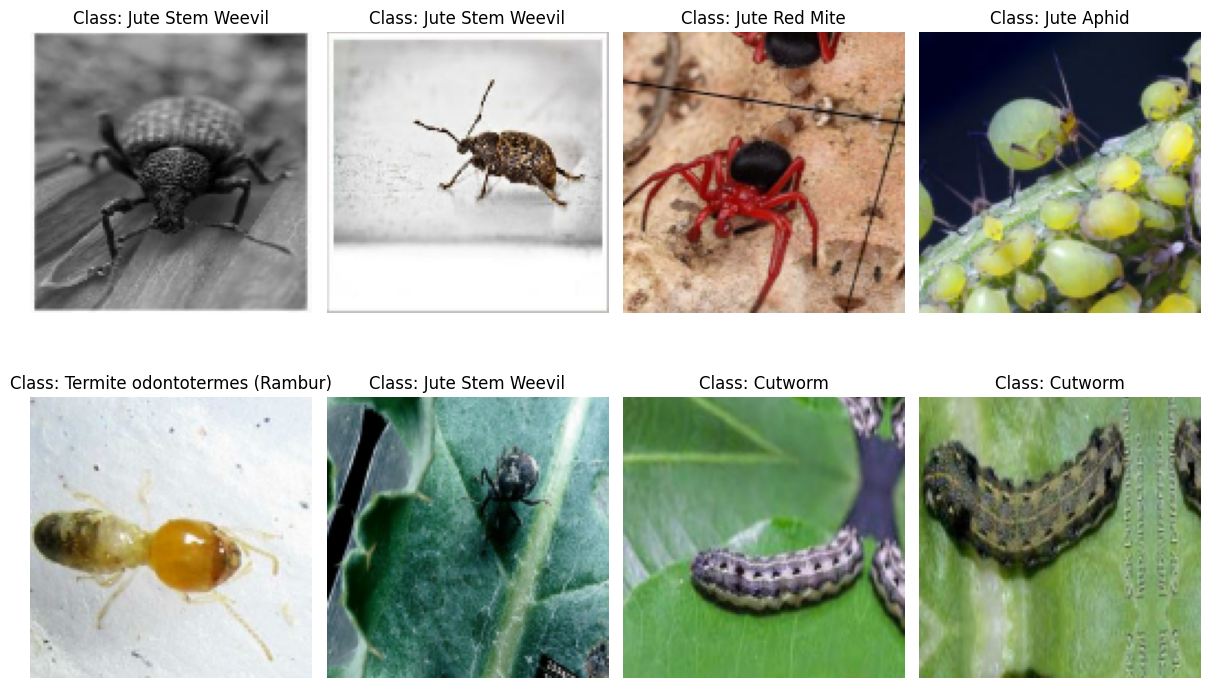

In [ ]:
# STEP 3: Visualize samples from your dataset

def visualize_samples(dataset, class_names, num_samples=8):
    """
    Display sample images from the dataset
    """
    print("🖼️ Visualizing sample images...")

    plt.figure(figsize=(12, 8))
    for images, labels in dataset.take(1):  # Take first batch
        for i in range(min(num_samples, len(images))):
            plt.subplot(2, 4, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))

            # Get the class name
            label_idx = tf.argmax(labels[i]).numpy()
            class_name = class_names[label_idx]

            plt.title(f"Class: {class_name}")
            plt.axis("off")

    plt.tight_layout()
    plt.show()

# Visualize training samples
visualize_samples(train_ds, class_names)

In [ ]:
# STEP 4: Get dataset statistics

def get_dataset_stats(train_ds, val_ds, test_ds, class_names):
    """
    Calculate and display dataset statistics
    """
    print("Dataset Statistics")
    print("=" * 40)

    def count_images(dataset):
        total = 0
        for images, labels in dataset:
            total += images.shape[0]
        return total

    train_count = count_images(train_ds)
    val_count = count_images(val_ds)
    test_count = count_images(test_ds)
    total_count = train_count + val_count + test_count

    print(f"Number of classes: {len(class_names)}")
    print(f"Training images: {train_count} ({train_count/total_count*100:.1f}%)")
    print(f"Validation images: {val_count} ({val_count/total_count*100:.1f}%)")
    print(f"Test images: {test_count} ({test_count/total_count*100:.1f}%)")
    print(f"Total images: {total_count}")
    print(f"Class names: {class_names}")

# Get statistics
get_dataset_stats(train_ds, val_ds, test_ds, class_names)

📈 Dataset Statistics
🏷️  Number of classes: 17
📊 Training images: 6443 (89.1%)
📊 Validation images: 413 (5.7%)
📊 Test images: 379 (5.2%)
📈 Total images: 7235
🎯 Class names: ['Beet Armyworm', 'Black Hairy', 'Cutworm', 'Field Cricket', 'Jute Aphid', 'Jute Hairy', 'Jute Red Mite', 'Jute Semilooper', 'Jute Stem Girdler', 'Jute Stem Weevil', 'Leaf Beetle', 'Mealybug', 'Pod Borer', 'Scopula Emissaria', 'Termite', 'Termite odontotermes (Rambur)', 'Yellow Mite']


In [ ]:
# STEP 5: Optimize dataset performance

def optimize_dataset(train_ds, val_ds, test_ds):
    """
    Optimize dataset for better performance during training
    """
    # Prefetch and cache for better performance
    AUTOTUNE = tf.data.AUTOTUNE

    train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
    val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
    test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

    print("✅ Dataset optimization completed!")
    return train_ds, val_ds, test_ds

# Optimize datasets
train_ds, val_ds, test_ds = optimize_dataset(train_ds, val_ds, test_ds)

✅ Dataset optimization completed!


In [ ]:
# STEP 1: Build the CNN Model (Assignment Questions 4, 5, 6)
from tensorflow.keras import layers, models

def create_cnn_model(input_shape=(128, 128, 3), num_classes=17):
    """
    Create CNN model according to assignment specifications
    Q4: Build the CNN model with specified layers
    Q5: Determine parameters (activation functions, kernel sizes, etc.)
    Q6: Justify activation function selections
    """
    print("Building CNN Model...")
    print("=" * 50)

    model = models.Sequential([
        # First Convolutional Block (Q4)
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape,
                     name='conv1'),
        layers.MaxPooling2D((2, 2), name='pool1'),

        # Second Convolutional Block (Q4)
        layers.Conv2D(64, (3, 3), activation='relu', name='conv2'),
        layers.MaxPooling2D((2, 2), name='pool2'),

        # Third Convolutional Block (Additional for better performance)
        layers.Conv2D(128, (3, 3), activation='relu', name='conv3'),
        layers.MaxPooling2D((2, 2), name='pool3'),

        # Flatten layer
        layers.Flatten(name='flatten'),

        # Fully connected layers (Q4)
        layers.Dense(256, activation='relu', name='dense1'),
        layers.Dropout(0.5, name='dropout1'),

        layers.Dense(128, activation='relu', name='dense2'),
        layers.Dropout(0.5, name='dropout2'),

        # Output layer (Q4)
        layers.Dense(num_classes, activation='softmax', name='output')
    ])

    return model

# Create the model
num_classes = len(class_names)
model = create_cnn_model(input_shape=(128, 128, 3), num_classes=num_classes)

# Display model architecture
print("Model Architecture:")
model.summary()

print("\n JUSTIFICATIONS (Q6):")
print("• ReLU activation in hidden layers: Prevents vanishing gradient, faster convergence")
print("• Softmax activation in output layer: Perfect for multi-class classification")
print("• Dropout (0.5): Reduces overfitting for better generalization")
print("• 3 Conv layers: Extracts hierarchical features from simple to complex")

🛠️ Building CNN Model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


📋 Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout1 (Dropout)              │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout2 (Dropout)              │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 17)             │         2,193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,551,121 (24.99 MB)

 Trainable params: 6,551,121 (24.99 MB)

 Non-trainable params: 0 (0.00 B)


🎯 JUSTIFICATIONS (Q6):
• ReLU activation in hidden layers: Prevents vanishing gradient, faster convergence
• Softmax activation in output layer: Perfect for multi-class classification
• Dropout (0.5): Reduces overfitting for better generalization
• 3 Conv layers: Extracts hierarchical features from simple to complex


In [ ]:
# STEP 2: Compile the Model (Assignment Questions 8, 9)

def compile_model(model, learning_rate=0.001):
    """
    Q8: Choose optimizer and justify selection
    Q9: Set learning rate
    """
    print("Compiling Model...")
    print("=" * 40)

    # Q8: Using Adam optimizer - adaptive learning rate, good for CNN
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',  # For multi-class classification
        metrics=['accuracy',
                tf.keras.metrics.Precision(name='precision'),
                tf.keras.metrics.Recall(name='recall')]
    )

    print("Model compiled successfully!")
    print(f"Optimizer: Adam (Q8 Justification: Adaptive learning rate, efficient for CNNs)")
    print(f"Learning Rate: {learning_rate} (Q9: Standard starting point for Adam)")

    return model

# Compile the model
model = compile_model(model, learning_rate=0.001)

⚙️ Compiling Model...
✅ Model compiled successfully!
🎯 Optimizer: Adam (Q8 Justification: Adaptive learning rate, efficient for CNNs)
📚 Learning Rate: 0.001 (Q9: Standard starting point for Adam)


In [ ]:
# STEP 3: Train the Model (Assignment Question 7)

print("Starting Model Training (20 epochs as per assignment)...")
print("=" * 50)

# Define callbacks for better training
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=3)
]

# Train the model for 20 epochs (as per assignment requirement)
history = model.fit(
    train_ds,
    epochs=20,
    validation_data=val_ds,
    callbacks=callbacks,
    verbose=1
)

print("✅ Training completed!")

Starting Model Training (20 epochs as per assignment)...


NameError: name 'tf' is not defined

In [ ]:
# STEP 4: Plot Training History (Assignment Question 7)

def plot_training_history(history):
    """
    Plot training and validation loss/accuracy
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot training & validation loss
    ax1.plot(history.history['loss'], label='Training Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_title('Model Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)

    # Plot training & validation accuracy
    ax2.plot(history.history['accuracy'], label='Training Accuracy')
    ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_title('Model Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

    # Print final metrics
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]

    print(f"Final Training Accuracy: {final_train_acc:.4f}")
    print(f"Final Validation Accuracy: {final_val_acc:.4f}")
    print(f"Final Training Loss: {final_train_loss:.4f}")
    print(f"Final Validation Loss: {final_val_loss:.4f}")

# Plot the training history
plot_training_history(history)

NameError: name 'history' is not defined

In [ ]:
# STEP 4: Plot Training History (Assignment Question 7)

def plot_training_history(history):
    """
    Plot training and validation loss/accuracy
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot training & validation loss
    ax1.plot(history.history['loss'], label='Training Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_title('Model Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)

    # Plot training & validation accuracy
    ax2.plot(history.history['accuracy'], label='Training Accuracy')
    ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_title('Model Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

    # Print final metrics
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]

    print(f"Final Training Accuracy: {final_train_acc:.4f}")
    print(f"Final Validation Accuracy: {final_val_acc:.4f}")
    print(f"Final Training Loss: {final_train_loss:.4f}")
    print(f"Final Validation Loss: {final_val_loss:.4f}")

# Plot the training history
plot_training_history(history)

NameError: name 'history' is not defined

In [ ]:
# =============================================================================
# STEP 2: Set up Git in Colab
# =============================================================================

print("🔧 Setting up Git configuration...")

# Install git
!apt-get install git -y

# Configure Git with your details (REPLACE WITH YOUR INFO)
!git config --global user.name "supul peiris"
!git config --global user.email "supulpeiris@gmail.com"

# Verify configuration
!git config --global --list

print("✅ Git configured successfully!")

🔧 Setting up Git configuration...
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.15).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
user.name=supul peiris
user.email=supulpeiris@gmail.com
✅ Git configured successfully!


In [ ]:
# =============================================================================
# STEP 1: Clone your GitHub repository
# =============================================================================

print("📥 Cloning GitHub repository...")

# REPLACE THIS WITH YOUR ACTUAL GITHUB REPOSITORY URL
# Example: "https://github.com/yourusername/EN3150_Assignment_03_Jute_Pest.git"
GITHUB_REPO_URL = "https://github.com/supulpeiris/EN3150_Assignment_03.git"

# Clone the repository
!git clone {GITHUB_REPO_URL}

print("✅ Repository cloned successfully!")

📥 Cloning GitHub repository...
Cloning into 'EN3150_Assignment_03'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.
✅ Repository cloned successfully!


In [ ]:
# =============================================================================
# STEP 2: Navigate to the repository
# =============================================================================

import os

# Change directory to your repository
os.chdir('/content/EN3150_Assignment_03')

# Verify we're in the right place
print(f"📁 Current directory: {os.getcwd()}")
print(f"📄 Files in repo: {os.listdir()}")

print("✅ Successfully navigated to repository!")

📁 Current directory: /content/EN3150_Assignment_03
📄 Files in repo: ['README.md', '.git']
✅ Successfully navigated to repository!


In [ ]:
# =============================================================================
# BETTER WAY: Show directory structure using Python
# =============================================================================

import os

def show_directory_structure(startpath='.', max_depth=3):
    """
    Display directory structure like tree command
    """
    print("📂 Directory Structure:")
    print("=" * 50)

    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        if level <= max_depth:
            indent = '  ' * level
            print(f"{indent}📁 {os.path.basename(root)}/")
            subindent = '  ' * (level + 1)

            # Show files in current directory
            for file in files[:10]:  # Show first 10 files only
                print(f"{subindent}📄 {file}")
            if len(files) > 10:
                print(f"{subindent}... and {len(files) - 10} more files")

# Show the structure
show_directory_structure('.', max_depth=2)

📂 Directory Structure:
📁 ./
  📄 README.md
  📁 .git/
    📄 description
    📄 packed-refs
    📄 config
    📄 index
    📄 HEAD
    📁 hooks/
      📄 pre-applypatch.sample
      📄 pre-commit.sample
      📄 pre-receive.sample
      📄 pre-rebase.sample
      📄 fsmonitor-watchman.sample
      📄 push-to-checkout.sample
      📄 pre-merge-commit.sample
      📄 pre-push.sample
      📄 prepare-commit-msg.sample
      📄 post-update.sample
      ... and 3 more files
    📁 objects/
    📁 info/
      📄 exclude
    📁 branches/
    📁 logs/
      📄 HEAD
    📁 refs/


In [ ]:
# =============================================================================
# OPTIONAL: Install tree command
# =============================================================================

print("📥 Installing tree command...")
!apt-get install tree -y

print("📂 Now using tree command:")
!tree -L 2  # Show 2 levels deep

📥 Installing tree command...
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 0s (101 kB/s)
Selecting previously unselected package tree.
(Reading database ... 126455 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...
📂 Now using tree command:
.
└── README.md

0 directories, 1 file
